<a href="https://colab.research.google.com/github/Unknown52790/Sales-Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing the Libraries***

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

***Read the Files***

In [2]:
df1 = pd.read_csv("/content/New sales_order list 2020.csv", encoding=('ISO-8859-1'))
df2 = pd.read_csv("/content/New sales_order list 2021.csv", encoding=('ISO-8859-1'))
df3 = pd.read_csv("/content/New sales_order list 2022.csv", encoding=('ISO-8859-1'))
df4 = pd.read_csv("/content/New sales_order list 2023.csv", encoding=('ISO-8859-1'))

<ipython-input-2-e19783f05a78>:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("/content/New sales_order list 2022.csv", encoding=('ISO-8859-1'))


In [3]:
print("df1:")
display(df1.head())
print("df2:")
display(df2.head())
print("df3")
display(df3.head())
print("df4")
display(df4.head())

df1:


,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,RK01,Sales Org RK01,10,Retailer,ZSW,Standard Order-SW,5526292,1,...,1,0,742.13,742.13,AED,1.0,07/09/2020,SCE,SW,SW
1,10,Finished Goods-Tiles,RK01,Sales Org RK01,60,Distributor,ZOR,Standard Order-Tiles,5553056,10,...,0,0,30.71,"35,709.59",AED,1.0,31/12/2020,T9GD,MC9,MC9
2,10,Finished Goods-Tiles,RK01,Sales Org RK01,20,Trader,ZOR,Standard Order-Tiles,5553054,10,...,36,0,39.00,"1,404.00",AED,1.0,31/12/2020,T8GD,MC8,MC8
3,10,Finished Goods-Tiles,RK01,Sales Org RK01,20,Trader,ZOR,Standard Order-Tiles,5553053,10,...,14.040,0,64.78,909.51,AED,1.0,31/12/2020,SMC8,MC8,MC8
4,20,Finished Goods-Sanit,RK01,Sales Org RK01,20,Trader,ZSW,Standard Order-SW,5553045,10,...,1,0,964.75,964.75,AED,1.0,31/12/2020,SCE,SW,SW


df2:


,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,10,Finished Goods-Tiles,RK01,Sales Org RK01,10,Retailer,ZOR,Standard Order-Tiles,5583653,1,...,0,0,108.72,"3,757.36",AED,1.0,02/06/2021,WMC8,MC8,MC8
1,10,Finished Goods-Tiles,RK01,Sales Org RK01,11,Own Retail,ZOR,Standard Order-Tiles,5623926,10,...,3.960,0,29.63,117.33,AED,1.0,30/12/2021,T7GD,MC7,MC7
2,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5623925,10,...,3,0,159.64,478.92,AED,1.0,30/12/2021,SCE,SW,SW
3,10,Finished Goods-Tiles,RK01,Sales Org RK01,11,Own Retail,ZOR,Standard Order-Tiles,5623922,10,...,144.840,0,20.88,"3,024.26",AED,1.0,30/12/2021,T9GD,MC9,MC9
4,10,Finished Goods-Tiles,RK01,Sales Org RK01,11,Own Retail,ZOR,Standard Order-Tiles,5623921,10,...,60.800,0,66.72,"4,056.58",AED,1.0,30/12/2021,M3GD,MC3,MC3


df3


,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695615,10,...,4,0,400.00,"1,600.00",AED,1.0,01/02/2023,EL01,EL01,EL01
1,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695613,10,...,2,0,910.00,"1,820.00",AED,1.0,05/01/2023,SCE,SW,SW
2,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695611,10,...,1,0,329.99,329.99,AED,1.0,31/12/2022,SCE,SW,SW
3,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695610,10,...,2,0,98.80,197.60,AED,1.0,04/01/2023,EL01,EL01,EL01
4,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5695608,10,...,1,0,32.50,32.50,AED,1.0,31/12/2022,SU10,EL01,EL01


df4


,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5767407,10,...,0,2,88.00,176.00,AED,1.0,06/01/2024,EL01,EL01,EL01
1,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5767404,10,...,0,10,519.20,"5,192.00",AED,1.0,30/12/2023,SCE,SW,SW
2,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5767396,10,...,0,2,396.50,793.00,AED,1.0,05/01/2024,SCE,SW,SW
3,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5767391,10,...,0,1,423.80,423.80,AED,1.0,30/12/2023,SBT,SW,SW
4,20,Finished Goods-Sanit,RK01,Sales Org RK01,11,Own Retail,ZSW,Standard Order-SW,5767389,10,...,0,1,620.75,620.75,AED,1.0,30/12/2023,SCE,SW,SW


In [4]:
df = pd.concat([df1, df2, df3, df4])

In [5]:
df= pd.concat([df1, df2, df3, df4], ignore_index=True)

In [6]:
df1.shape

(156308, 28)

In [7]:
df2.shape

(119193, 28)

In [8]:
df3.shape

(45075, 28)

In [9]:
df4.shape

(5844, 28)

In [10]:
df.shape

(326420, 28)

***Data Frame Functions***

In [11]:
df.head()

,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,RK01,Sales Org RK01,10,Retailer,ZSW,Standard Order-SW,5526292,1,...,1,0,742.13,742.13,AED,1.0,07/09/2020,SCE,SW,SW
1,10,Finished Goods-Tiles,RK01,Sales Org RK01,60,Distributor,ZOR,Standard Order-Tiles,5553056,10,...,0,0,30.71,"35,709.59",AED,1.0,31/12/2020,T9GD,MC9,MC9
2,10,Finished Goods-Tiles,RK01,Sales Org RK01,20,Trader,ZOR,Standard Order-Tiles,5553054,10,...,36,0,39.00,"1,404.00",AED,1.0,31/12/2020,T8GD,MC8,MC8
3,10,Finished Goods-Tiles,RK01,Sales Org RK01,20,Trader,ZOR,Standard Order-Tiles,5553053,10,...,14.040,0,64.78,909.51,AED,1.0,31/12/2020,SMC8,MC8,MC8
4,20,Finished Goods-Sanit,RK01,Sales Org RK01,20,Trader,ZSW,Standard Order-SW,5553045,10,...,1,0,964.75,964.75,AED,1.0,31/12/2020,SCE,SW,SW


In [12]:
df.tail()

,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
326415,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1830,...,0,14,153.00,"3,672.00",AED,1.0,20/01/2024,SCE,SW,SW
326416,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1830,...,10,0,153.00,"3,672.00",AED,1.0,25/12/2023,SCE,SW,SW
326417,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1840,...,10,14,0.00,0.00,AED,1.0,20/01/2024,SCE,SW,SW
326418,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1850,...,10,14,0.00,0.00,AED,1.0,20/01/2024,SCE,SW,SW
326419,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1860,...,0,15,22.10,331.50,AED,1.0,20/01/2024,SCE,SW,SW


In [13]:
df.describe()

,Division,Distribution Channel,Sales Document,Sales Document Item,Sold-To Party,Exchange Rate
count,326420.000000,326420.000000,3.264200e+05,326420.000000,3.264200e+05,326420.000000
mean,16.279885,21.806826,5.565725e+06,107.413023,1.740673e+06,1.214046
std,4.833422,14.014134,7.833838e+04,187.080938,2.357567e+06,0.802929
min,10.000000,10.000000,2.210000e+03,1.000000,1.100000e+01,0.978300
25%,10.000000,11.000000,5.516896e+06,20.000000,9.060000e+02,1.000000
50%,20.000000,20.000000,5.556921e+06,50.000000,5.641300e+04,1.000000
75%,20.000000,24.000000,5.606243e+06,120.000000,5.016206e+06,1.000000
max,20.000000,84.000000,5.767407e+06,2940.000000,5.075215e+06,5.219680


In [14]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [15]:
df['Sched.line category'].value_counts()

ZQ    157467
ZS    116833
CP     37628
CN      7887
ZL      4673
CL      1930
ZW         1
CT         1
Name: Sched.line category, dtype: int64

In [16]:
df['Sched.line category'].mode()

0    ZQ
Name: Sched.line category, dtype: object

In [17]:
df['Sched.line category'].fillna(df['Sched.line category'].mode()[0],inplace=True)

In [18]:
df['Sched.line category']

0         ZQ
1         CP
2         ZS
3         ZS
4         ZQ
          ..
326415    ZQ
326416    ZQ
326417    CN
326418    CN
326419    ZQ
Name: Sched.line category, Length: 326420, dtype: object

In [19]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [20]:
df['Sales Unit'].value_counts()

PC     206171
M2     117680
RM       1369
SET       805
PAC       303
BOX        63
PAA        29
Name: Sales Unit, dtype: int64

In [21]:
df['Sales Unit'].mode()

0    PC
Name: Sales Unit, dtype: object

In [22]:
df['Sales Unit'].fillna(df['Sales Unit'].mode()[0],inplace=True)

In [23]:
df.tail()

,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
326415,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1830,...,0,14,153.00,"3,672.00",AED,1.0,20/01/2024,SCE,SW,SW
326416,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1830,...,10,0,153.00,"3,672.00",AED,1.0,25/12/2023,SCE,SW,SW
326417,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1840,...,10,14,0.00,0.00,AED,1.0,20/01/2024,SCE,SW,SW
326418,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1850,...,10,14,0.00,0.00,AED,1.0,20/01/2024,SCE,SW,SW
326419,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1860,...,0,15,22.10,331.50,AED,1.0,20/01/2024,SCE,SW,SW


In [24]:
df['Order Quantity (Schedule Line)'].value_counts()

1            57611
2            24307
5            13066
3            12951
10           10724
             ...  
404.820          1
614.680          1
632.160          1
4,100.800        1
1,881            1
Name: Order Quantity (Schedule Line), Length: 8810, dtype: int64

In [25]:
df['Order Quantity (Schedule Line)'].mode()

0    1
Name: Order Quantity (Schedule Line), dtype: object

In [26]:
df['Order Quantity (Schedule Line)'].fillna(df['Order Quantity (Schedule Line)'].mode()[0],inplace=True)

In [27]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [28]:
df['Delivered Quantity SU'].value_counts()

0          60218
1          50646
2          21353
5          11733
3          11477
           ...  
94.320         1
68.320         1
780.840        1
576.720        1
1,110          1
Name: Delivered Quantity SU, Length: 6920, dtype: int64

In [29]:
df['Delivered Quantity SU'].mode()

0    0
Name: Delivered Quantity SU, dtype: object

In [30]:
df['Delivered Quantity SU'].fillna(df['Delivered Quantity SU'].mode()[0],inplace=True)

In [31]:
df['Pending Quantity SU'].value_counts()

0            301718
0.0           12264
1              1429
2               849
3               503
              ...  
2,529.600         1
132.060           1
355.680           1
63.200            1
771               1
Name: Pending Quantity SU, Length: 2460, dtype: int64

In [32]:
df['Pending Quantity SU'].mode()

0    0
Name: Pending Quantity SU, dtype: object

In [33]:
df['Pending Quantity SU'].fillna(df['Pending Quantity SU'].mode()[0],inplace=True)

In [34]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [35]:
df['Net Price'].value_counts()

0.00      42852
0.01      10828
18.00      2591
55.00      2291
14.00      1901
          ...  
142.96        1
89.21         1
105.79        1
977.60        1
150.78        1
Name: Net Price, Length: 14410, dtype: int64

In [36]:
df['Net Price'].mode()

0    0.00
Name: Net Price, dtype: object

In [37]:
df['Net Price'].fillna(df['Net Price'].mode()[0],inplace=True)

In [38]:
df.tail()

,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
326415,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1830,...,0,14,153.00,"3,672.00",AED,1.0,20/01/2024,SCE,SW,SW
326416,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1830,...,10,0,153.00,"3,672.00",AED,1.0,25/12/2023,SCE,SW,SW
326417,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1840,...,10,14,0.00,0.00,AED,1.0,20/01/2024,SCE,SW,SW
326418,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1850,...,10,14,0.00,0.00,AED,1.0,20/01/2024,SCE,SW,SW
326419,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1860,...,0,15,22.10,331.50,AED,1.0,20/01/2024,SCE,SW,SW


In [39]:
df['Net Value (Item)'].value_counts()

0.00        42822
0.01         4815
0.02         1825
0.03          848
150.00        727
            ...  
5,280.19        1
1,518.91        1
32.17           1
518.72          1
35.09           1
Name: Net Value (Item), Length: 67039, dtype: int64

In [40]:
df['Net Value (Item)'].mode()

0    0.00
Name: Net Value (Item), dtype: object

In [41]:
df['Net Value (Item)'].fillna(df['Net Value (Item)'].mode()[0],inplace=True)

In [42]:
df.tail()

,Division,Division Name,Sales Organization,Sales Organization Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document,Sales Document Item,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
326415,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1830,...,0,14,153.00,"3,672.00",AED,1.0,20/01/2024,SCE,SW,SW
326416,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1830,...,10,0,153.00,"3,672.00",AED,1.0,25/12/2023,SCE,SW,SW
326417,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1840,...,10,14,0.00,0.00,AED,1.0,20/01/2024,SCE,SW,SW
326418,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1850,...,10,14,0.00,0.00,AED,1.0,20/01/2024,SCE,SW,SW
326419,20,Finished Goods-Sanit,RK01,Sales Org RK01,22,Traders/Retailers,ZSW,Standard Order-SW,5747363,1860,...,0,15,22.10,331.50,AED,1.0,20/01/2024,SCE,SW,SW


In [43]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [44]:
df['Document Currency'].value_counts()

AED    303872
USD     12662
GBP      8564
EUR      1116
SAR       206
Name: Document Currency, dtype: int64

In [45]:
df['Document Currency'].mode()

0    AED
Name: Document Currency, dtype: object

In [46]:
df['Document Currency'].fillna(df['Document Currency'].mode()[0],inplace=True)

In [47]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [48]:
df['Exchange Rate'].value_counts()

1.00000    303872
3.67350     12572
4.79428       463
4.93608       315
4.81669       285
            ...  
5.05767         1
4.13269         1
4.33767         1
5.00514         1
4.53200         1
Name: Exchange Rate, Length: 372, dtype: int64

In [49]:
df['Exchange Rate'].mode()

0    1.0
Name: Exchange Rate, dtype: float64

In [50]:
df['Exchange Rate'].fillna(df['Exchange Rate'].mode()[0],inplace=True)

In [51]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [52]:
df['Delivery Date'].value_counts()

13/12/2020    1449
20/05/2021    1197
01/11/2020    1138
18/12/2021    1114
30/11/2020    1093
              ... 
24/07/2022       1
29/02/2024       1
15/12/2024       1
08/01/2023       1
29/07/2023       1
Name: Delivery Date, Length: 1371, dtype: int64

In [53]:
df['Delivery Date'].fillna(df['Delivery Date'].mode()[0],inplace=True)

In [54]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [55]:
df['Storage Location'].value_counts()

SCE     104681
SA01     52302
T8GD     24359
T7GD     22409
EL01     16848
         ...  
ZSM4         1
ZSM2         1
SU07         1
SU08         1
SW01         1
Name: Storage Location, Length: 82, dtype: int64

In [56]:
df['Storage Location'].mode()

0    SCE
Name: Storage Location, dtype: object

In [57]:
df['Storage Location'].fillna(df['Storage Location'].mode()[0],inplace=True)

In [58]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [59]:
df['Shipping Point/Receiving Pt'].value_counts()

SW      185806
MC8      28889
MC9      25439
MC7      24344
EL01     16974
MC4      13080
MC5      10418
MC3       6955
MC6       5076
IN01      4915
SWTR      2210
MC2       1633
RAK        346
MC1        163
CH01        95
IR01        68
BG01         5
TREC         4
Name: Shipping Point/Receiving Pt, dtype: int64

In [60]:
df['Shipping Point/Receiving Pt'].mode()

0    SW
Name: Shipping Point/Receiving Pt, dtype: object

In [61]:
df['Shipping Point/Receiving Pt'].fillna(df['Shipping Point/Receiving Pt'].mode()[0],inplace=True)

In [62]:
df['Plant'].value_counts()

SW      185806
MC8      28889
MC9      25439
MC7      24344
EL01     16974
MC4      13080
MC5      10418
MC3       6955
MC6       5076
IN01      4915
SWTR      2210
MC2       1633
RAK        346
MC1        163
CH01        95
IR01        68
BG01         5
TREC         4
Name: Plant, dtype: int64

In [63]:
df['Plant'].mode()

0    SW
Name: Plant, dtype: object

In [64]:
df['Plant'].fillna(df['Plant'].mode()[0],inplace=True)

In [65]:
df.isnull().sum()

Division                          0
Division Name                     0
Sales Organization                0
Sales Organization Name           0
Distribution Channel              0
Distribution Channel Name         0
Sales Document Type               0
Sales Document Type.1             0
Sales Document                    0
Sales Document Item               0
Document Date                     0
Sold-To Party                     0
Sold-To Party Name                0
Material                          0
Item Type                         0
Sched.line category               0
Sales Unit                        0
Order Quantity (Schedule Line)    0
Delivered Quantity SU             0
Pending Quantity SU               0
Net Price                         0
Net Value (Item)                  0
Document Currency                 0
Exchange Rate                     0
Delivery Date                     0
Storage Location                  0
Shipping Point/Receiving Pt       0
Plant                       

In [66]:
df.drop(['Sales Organization', 'Sales Organization Name', 'Sales Document'], axis=1, inplace=True)

<ipython-input-67-36bbbcc76ee4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")


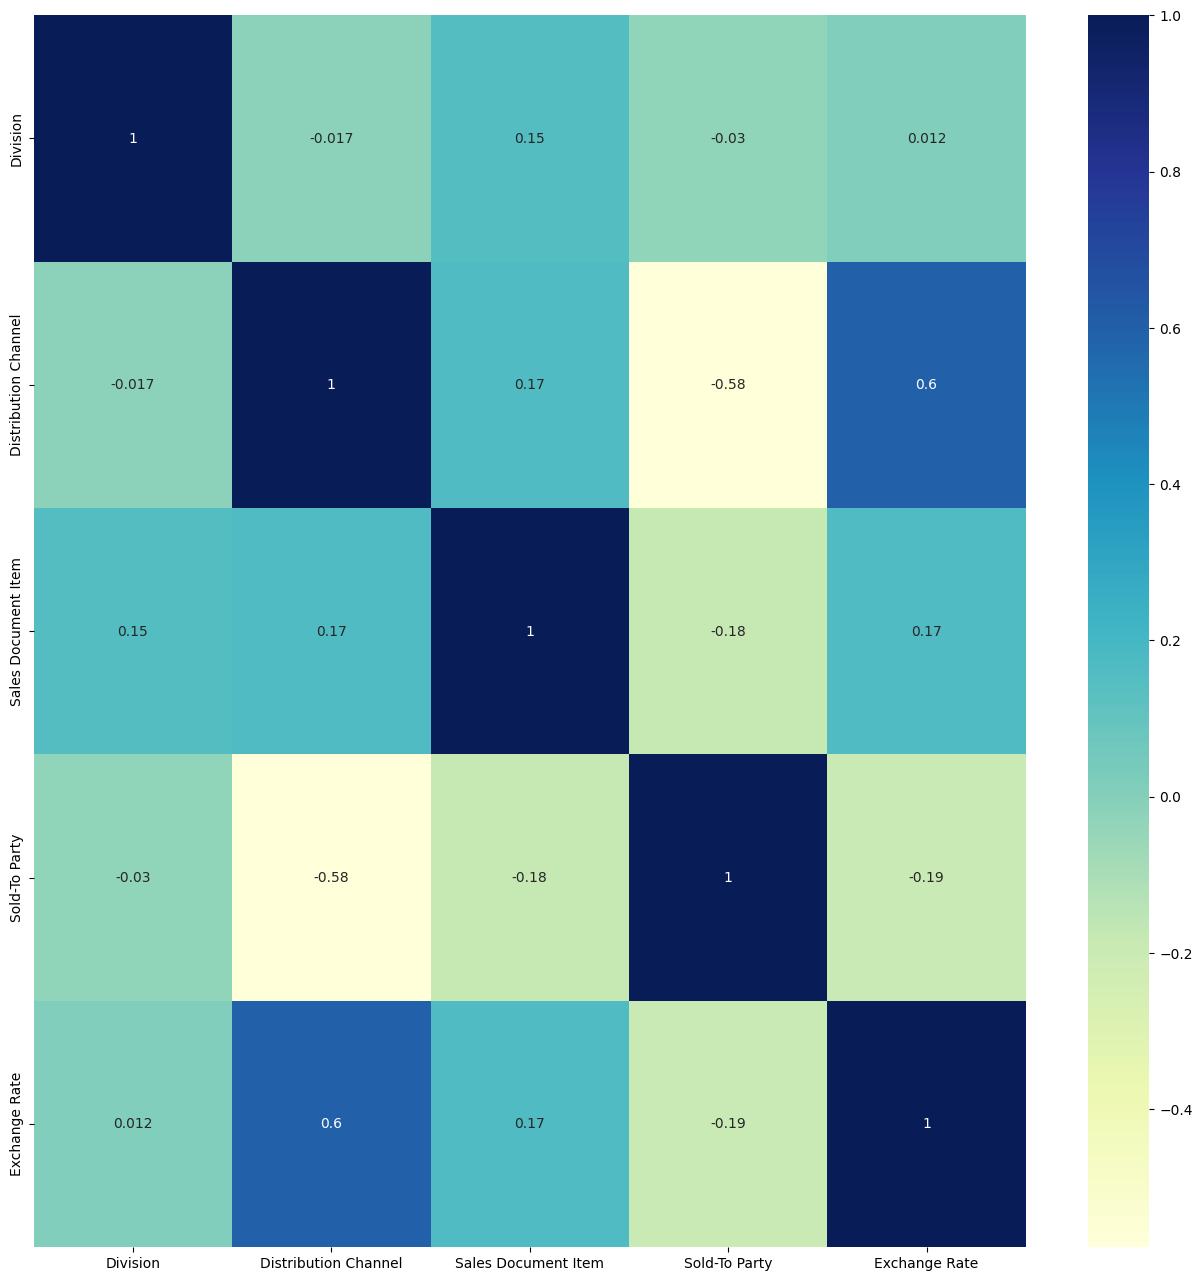

In [67]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.show()

<ipython-input-68-3193fecaa220>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="icefire")


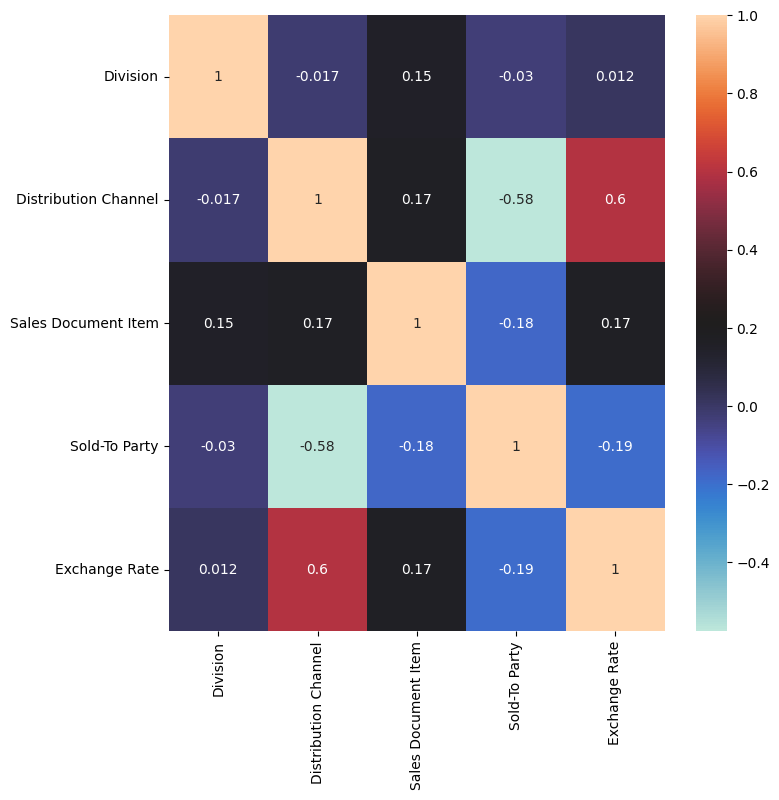

In [68]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),annot=True, cmap="icefire")
plt.show()

***Exploratory Data Analysis***

***Using Klib Library***

In [69]:
!pip install klib
import klib

<Axes: title={'center': 'Feature-correlation (pearson)'}>

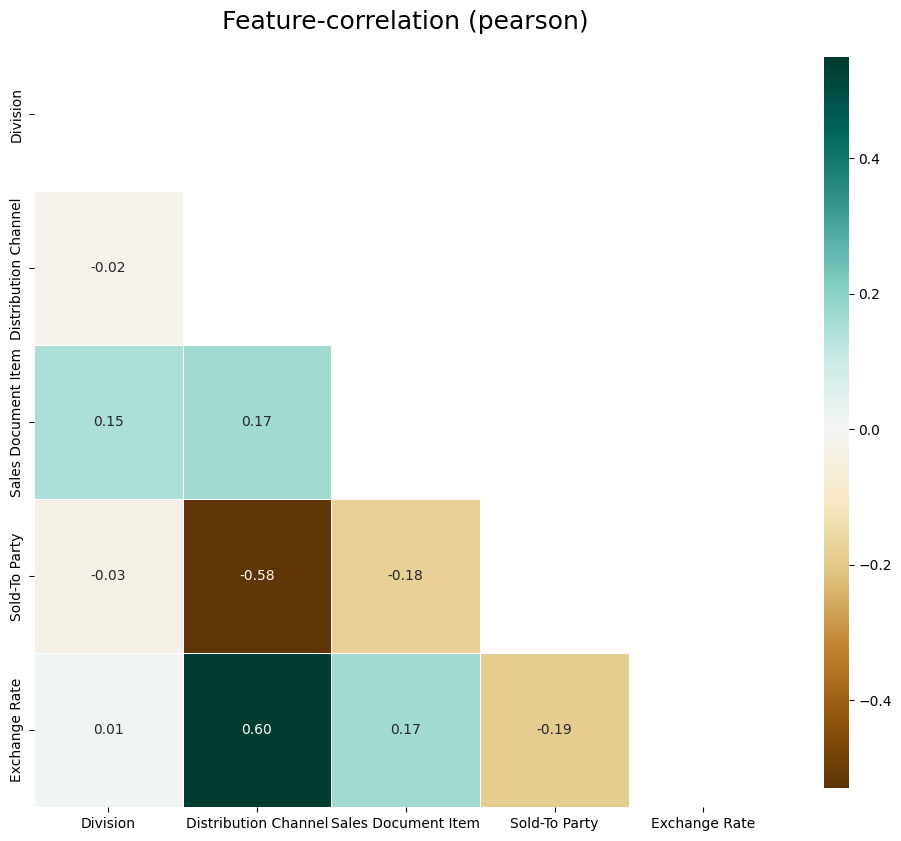

In [70]:
klib.corr_plot(df)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='Exchange Rate', ylabel='Density'>

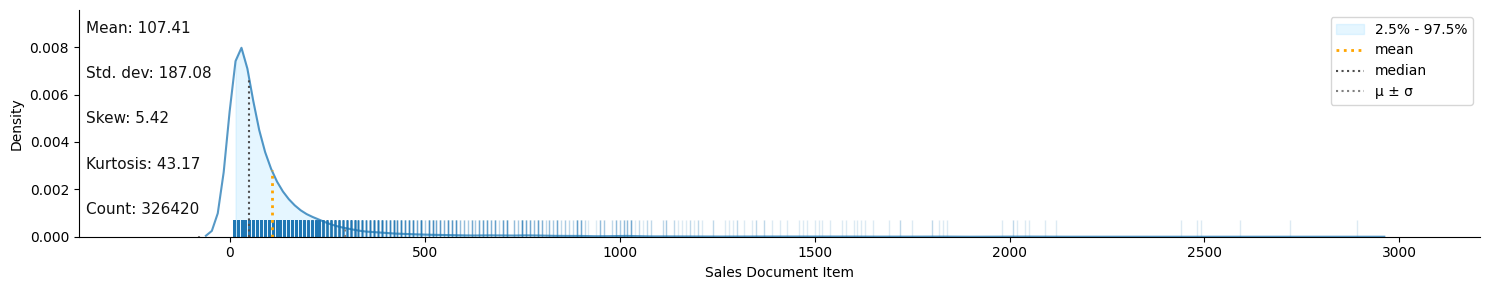

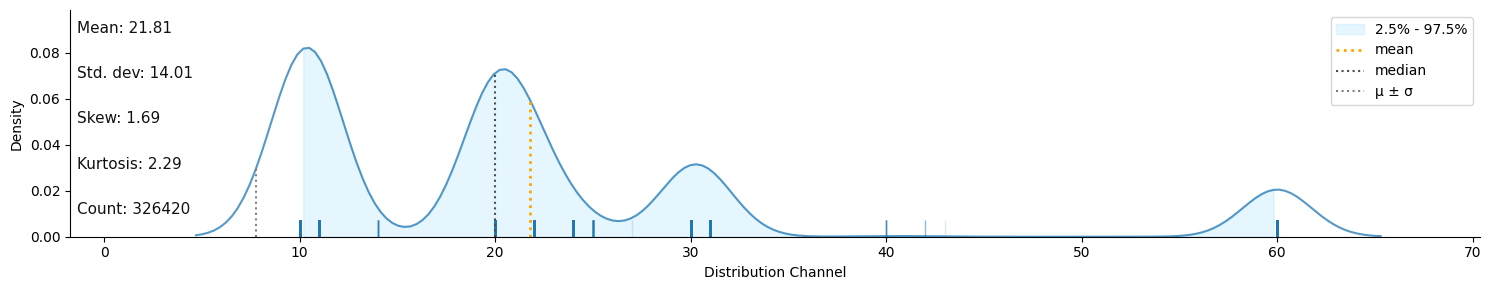

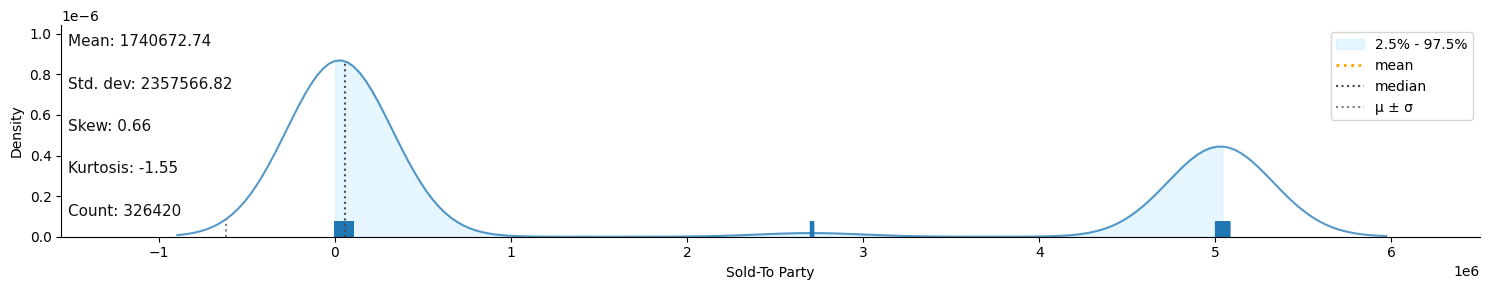

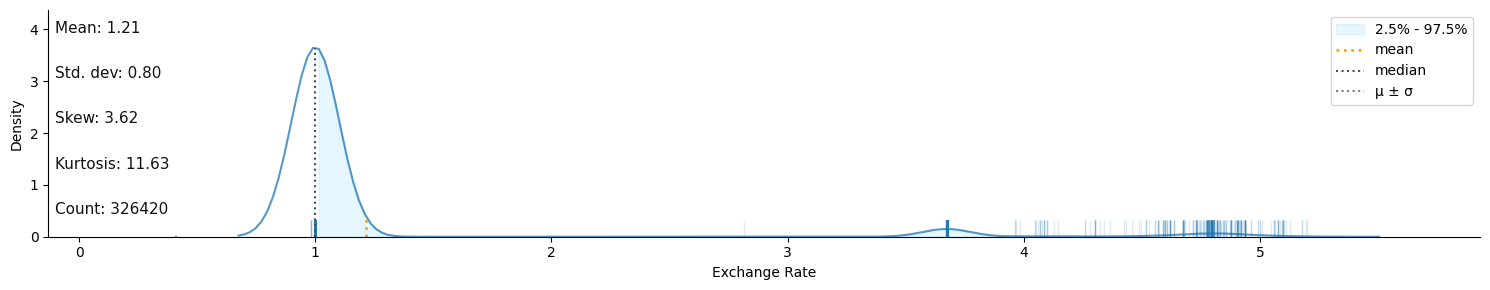

In [71]:
klib.dist_plot(df['Sales Document Item'])
klib.dist_plot(df['Distribution Channel'])
klib.dist_plot(df['Sold-To Party'])
klib.dist_plot(df['Exchange Rate'])

<ipython-input-72-a9e1dea3553f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales Document Item'], kde=True, bins = 70)


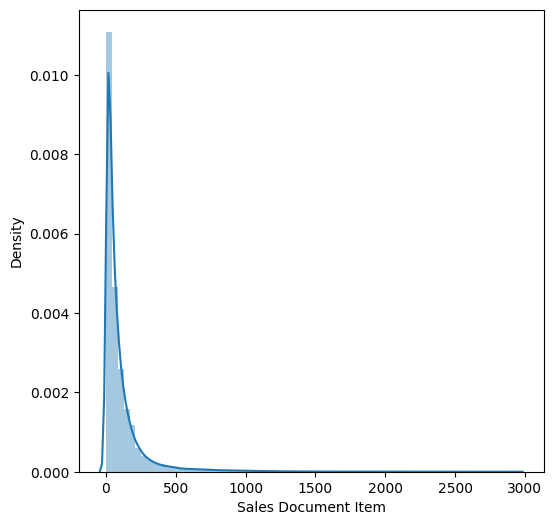

In [72]:
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.distplot(df['Sales Document Item'], kde=True, bins = 70)
plt.show()

<Figure size 600x600 with 0 Axes>

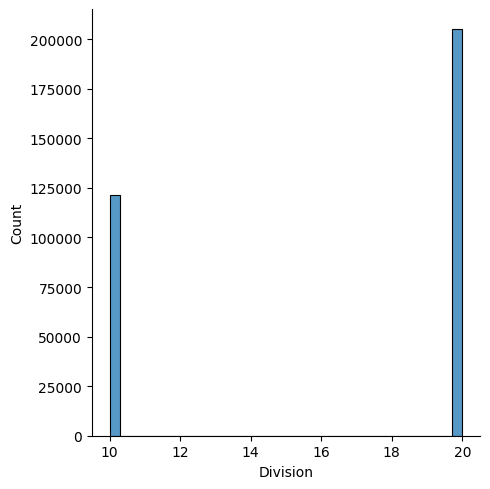

In [73]:
plt.figure(figsize=(6, 6))
sns.displot(df['Division'])
plt.show()

<ipython-input-74-5a7828c687a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Distribution Channel'])


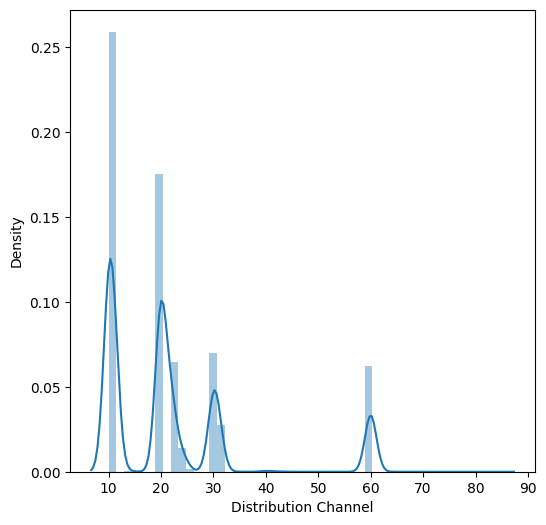

In [74]:
plt.figure(figsize=(6, 6))
sns.distplot(df['Distribution Channel'])
plt.show()

<Figure size 100x200 with 0 Axes>

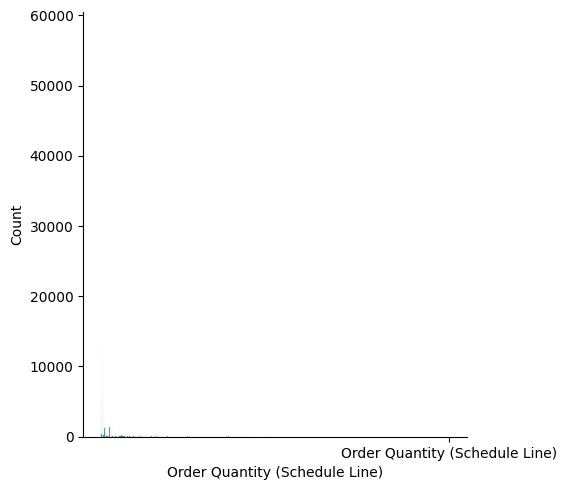

In [75]:
plt.figure(figsize=(1, 2))
sns.displot(df['Order Quantity (Schedule Line)'])
plt.xticks('Order Quantity (Schedule Line)')
plt.show()

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [77]:
df.head()

,Division,Division Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document Item,Document Date,Sold-To Party,Sold-To Party Name,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,Finished Goods-Sanit,10,Retailer,ZSW,Standard Order-SW,1,07/09/2020,5018478,FATEMA SALEM SAEED,...,1,0,742.13,742.13,AED,1.0,07/09/2020,SCE,SW,SW
1,10,Finished Goods-Tiles,60,Distributor,ZOR,Standard Order-Tiles,10,31/12/2020,85224,KSA Direct & Indirect Operations,...,0,0,30.71,"35,709.59",AED,1.0,31/12/2020,T9GD,MC9,MC9
2,10,Finished Goods-Tiles,20,Trader,ZOR,Standard Order-Tiles,10,31/12/2020,7622,ZARWANI TRDG & IMPORTING EST.,...,36,0,39.00,"1,404.00",AED,1.0,31/12/2020,T8GD,MC8,MC8
3,10,Finished Goods-Tiles,20,Trader,ZOR,Standard Order-Tiles,10,31/12/2020,903,AL TADAMON GENERAL TRADG,...,14.040,0,64.78,909.51,AED,1.0,31/12/2020,SMC8,MC8,MC8
4,20,Finished Goods-Sanit,20,Trader,ZSW,Standard Order-SW,10,31/12/2020,901,PRIME TECH. TRADING EST. LLC,...,1,0,964.75,964.75,AED,1.0,31/12/2020,SCE,SW,SW


In [78]:
df['Division Name'] = le.fit_transform(df['Division Name'])
df['Distribution Channel Name'] = le.fit_transform(df['Distribution Channel Name'])
df['Sales Document Type'] = le.fit_transform(df['Sales Document Type'])
df['Sales Document Type.1'] = le.fit_transform(df['Sales Document Type.1'])
df['Sold-To Party Name'] = le.fit_transform(df['Sold-To Party Name'])
df['Material'] = le.fit_transform(df['Material'])
df['Item Type'] = le.fit_transform(df['Item Type'])
df['Sched.line category'] = le.fit_transform(df['Sched.line category'])
df['Sales Unit'] = le.fit_transform(df['Sales Unit'])
df['Document Currency'] = le.fit_transform(df['Document Currency'])
df['Storage Location'] = le.fit_transform(df['Storage Location'])
df['Shipping Point/Receiving Pt'] = le.fit_transform(df['Shipping Point/Receiving Pt'])
df['Plant'] = le.fit_transform(df['Plant'])

In [79]:
df.head()

,Division,Division Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document Item,Document Date,Sold-To Party,Sold-To Party Name,...,Delivered Quantity SU,Pending Quantity SU,Net Price,Net Value (Item),Document Currency,Exchange Rate,Delivery Date,Storage Location,Shipping Point/Receiving Pt,Plant
0,20,0,10,13,1,0,1,07/09/2020,5018478,7969,...,1,0,742.13,742.13,0,1.0,07/09/2020,42,15,15
1,10,1,60,6,0,1,10,31/12/2020,85224,12136,...,0,0,30.71,"35,709.59",0,1.0,31/12/2020,67,13,13
2,10,1,20,14,0,1,10,31/12/2020,7622,22317,...,36,0,39.00,"1,404.00",0,1.0,31/12/2020,66,12,12
3,10,1,20,14,0,1,10,31/12/2020,903,3765,...,14.040,0,64.78,909.51,0,1.0,31/12/2020,48,12,12
4,20,0,20,14,1,0,10,31/12/2020,901,17142,...,1,0,964.75,964.75,0,1.0,31/12/2020,42,15,15


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326420 entries, 0 to 326419
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Division                        326420 non-null  int64  
 1   Division Name                   326420 non-null  int64  
 2   Distribution Channel            326420 non-null  int64  
 3   Distribution Channel Name       326420 non-null  int64  
 4   Sales Document Type             326420 non-null  int64  
 5   Sales Document Type.1           326420 non-null  int64  
 6   Sales Document Item             326420 non-null  int64  
 7   Document Date                   326420 non-null  object 
 8   Sold-To Party                   326420 non-null  int64  
 9   Sold-To Party Name              326420 non-null  int64  
 10  Material                        326420 non-null  int64  
 11  Item Type                       326420 non-null  int64  
 12  Sched.line categ

In [81]:
df.dtypes

Division                            int64
Division Name                       int64
Distribution Channel                int64
Distribution Channel Name           int64
Sales Document Type                 int64
Sales Document Type.1               int64
Sales Document Item                 int64
Document Date                      object
Sold-To Party                       int64
Sold-To Party Name                  int64
Material                            int64
Item Type                           int64
Sched.line category                 int64
Sales Unit                          int64
Order Quantity (Schedule Line)     object
Delivered Quantity SU              object
Pending Quantity SU                object
Net Price                          object
Net Value (Item)                   object
Document Currency                   int64
Exchange Rate                     float64
Delivery Date                      object
Storage Location                    int64
Shipping Point/Receiving Pt       

In [82]:
df['Document Date'] = pd.to_datetime(df['Document Date'], format='%d/%m/%Y')

In [83]:
df.dtypes

Division                                   int64
Division Name                              int64
Distribution Channel                       int64
Distribution Channel Name                  int64
Sales Document Type                        int64
Sales Document Type.1                      int64
Sales Document Item                        int64
Document Date                     datetime64[ns]
Sold-To Party                              int64
Sold-To Party Name                         int64
Material                                   int64
Item Type                                  int64
Sched.line category                        int64
Sales Unit                                 int64
Order Quantity (Schedule Line)            object
Delivered Quantity SU                     object
Pending Quantity SU                       object
Net Price                                 object
Net Value (Item)                          object
Document Currency                          int64
Exchange Rate       

In [84]:
df['year'] = df['Document Date'].dt.year
df['month'] = df['Document Date'].dt.month
df['day'] = df['Document Date'].dt.day
df['weekday'] = df['Document Date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)

In [85]:
df_all=df[['Document Date','year','month','day','weekday','Net Value (Item)']]
df_all.head(5)

,Document Date,year,month,day,weekday,Net Value (Item)
0,2020-09-07,2020,9,7,7,742.13
1,2020-12-31,2020,12,31,3,"35,709.59"
2,2020-12-31,2020,12,31,3,"1,404.00"
3,2020-12-31,2020,12,31,3,909.51
4,2020-12-31,2020,12,31,3,964.75


In [86]:
df['Delivery Date'] = pd.to_datetime(df["Delivery Date"], format='%d/%m/%Y')

In [87]:
df['del year'] = df['Delivery Date'].dt.year
df['del month'] = df['Delivery Date'].dt.month
df['del day'] = df['Delivery Date'].dt.day

In [88]:
df.head(5)

,Division,Division Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document Item,Document Date,Sold-To Party,Sold-To Party Name,...,Storage Location,Shipping Point/Receiving Pt,Plant,year,month,day,weekday,del year,del month,del day
0,20,0,10,13,1,0,1,2020-09-07,5018478,7969,...,42,15,15,2020,9,7,7,2020,9,7
1,10,1,60,6,0,1,10,2020-12-31,85224,12136,...,67,13,13,2020,12,31,3,2020,12,31
2,10,1,20,14,0,1,10,2020-12-31,7622,22317,...,66,12,12,2020,12,31,3,2020,12,31
3,10,1,20,14,0,1,10,2020-12-31,903,3765,...,48,12,12,2020,12,31,3,2020,12,31
4,20,0,20,14,1,0,10,2020-12-31,901,17142,...,42,15,15,2020,12,31,3,2020,12,31


In [89]:
df.head()

,Division,Division Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document Item,Document Date,Sold-To Party,Sold-To Party Name,...,Storage Location,Shipping Point/Receiving Pt,Plant,year,month,day,weekday,del year,del month,del day
0,20,0,10,13,1,0,1,2020-09-07,5018478,7969,...,42,15,15,2020,9,7,7,2020,9,7
1,10,1,60,6,0,1,10,2020-12-31,85224,12136,...,67,13,13,2020,12,31,3,2020,12,31
2,10,1,20,14,0,1,10,2020-12-31,7622,22317,...,66,12,12,2020,12,31,3,2020,12,31
3,10,1,20,14,0,1,10,2020-12-31,903,3765,...,48,12,12,2020,12,31,3,2020,12,31
4,20,0,20,14,1,0,10,2020-12-31,901,17142,...,42,15,15,2020,12,31,3,2020,12,31


In [90]:
df.tail()

,Division,Division Name,Distribution Channel,Distribution Channel Name,Sales Document Type,Sales Document Type.1,Sales Document Item,Document Date,Sold-To Party,Sold-To Party Name,...,Storage Location,Shipping Point/Receiving Pt,Plant,year,month,day,weekday,del year,del month,del day
326415,20,0,22,15,1,0,1830,2023-09-25,2713333,3141,...,42,15,15,2023,9,25,7,2024,1,20
326416,20,0,22,15,1,0,1830,2023-09-25,2713333,3141,...,42,15,15,2023,9,25,7,2023,12,25
326417,20,0,22,15,1,0,1840,2023-09-25,2713333,3141,...,42,15,15,2023,9,25,7,2024,1,20
326418,20,0,22,15,1,0,1850,2023-09-25,2713333,3141,...,42,15,15,2023,9,25,7,2024,1,20
326419,20,0,22,15,1,0,1860,2023-09-25,2713333,3141,...,42,15,15,2023,9,25,7,2024,1,20


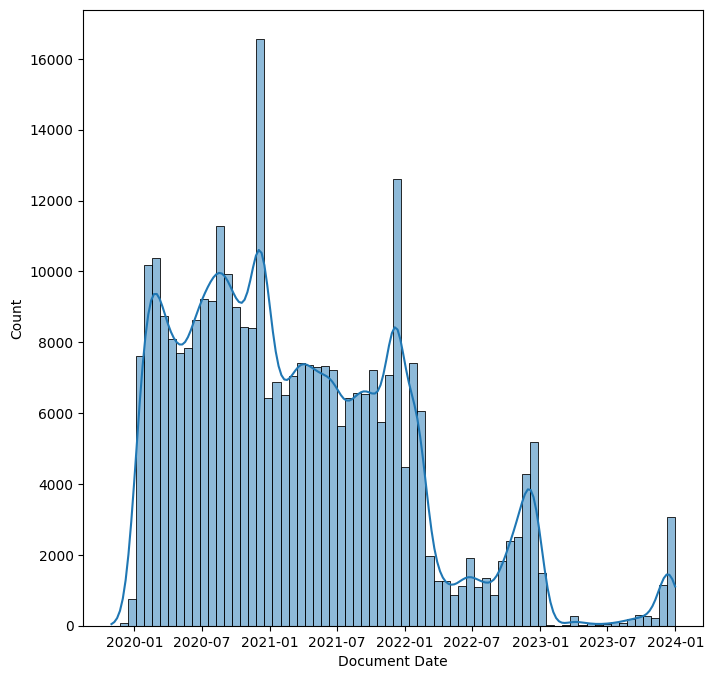

In [91]:
plt.figure(figsize=(8, 8))
sns.histplot(df['Document Date'], kde=True, bins = 70)
plt.show()

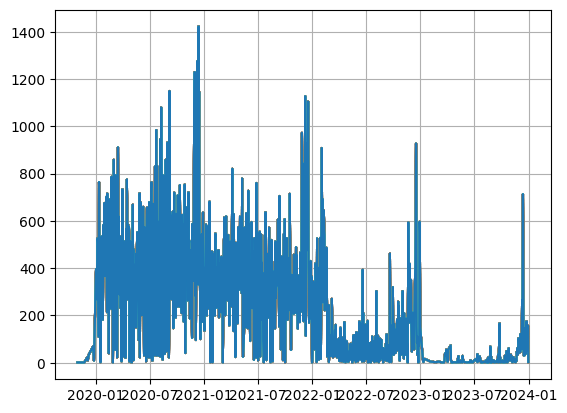

In [92]:
date = [date for date, df in df.groupby('Document Date')]
plt.plot(date, df.groupby(['Document Date']).count())
plt.grid()

In [93]:
#df['Net Value (Item)'] = df['Net Value (Item)'].astype(str)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326420 entries, 0 to 326419
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Division                        326420 non-null  int64         
 1   Division Name                   326420 non-null  int64         
 2   Distribution Channel            326420 non-null  int64         
 3   Distribution Channel Name       326420 non-null  int64         
 4   Sales Document Type             326420 non-null  int64         
 5   Sales Document Type.1           326420 non-null  int64         
 6   Sales Document Item             326420 non-null  int64         
 7   Document Date                   326420 non-null  datetime64[ns]
 8   Sold-To Party                   326420 non-null  int64         
 9   Sold-To Party Name              326420 non-null  int64         
 10  Material                        326420 non-null  int64  

In [95]:
df.shape

(326420, 32)

In [96]:
0.7*326420

228494.0

In [97]:
x_train = df.iloc[:228494, 0:12]
y_train = df.iloc[:228494, 13]

x_test = df.iloc[228495:, 0:12]
y_test = df.iloc[228495:, 13]

In [98]:
x = df[["Item Type", "Material", "Net Value (Item)", "Order Quantity (Schedule Line)", "Shipping Point/Receiving Pt"]]

In [99]:
x['Net Value (Item)'].dtype

dtype('O')

In [100]:
#x['Net Value (Item)'] = x['Net Value (Item)'].astype(str)

In [101]:
x.dtypes

Item Type                          int64
Material                           int64
Net Value (Item)                  object
Order Quantity (Schedule Line)    object
Shipping Point/Receiving Pt        int64
dtype: object

In [102]:
x

,Item Type,Material,Net Value (Item),Order Quantity (Schedule Line),Shipping Point/Receiving Pt
0,11,15283,742.13,1,15
1,6,1914,"35,709.59","1,162.800",13
2,4,1487,"1,404.00",36,12
3,4,6005,909.51,14.040,12
4,11,14553,964.75,1,15
...,...,...,...,...,...
326415,17,15355,"3,672.00",14,15
326416,17,15355,"3,672.00",10,15
326417,16,15352,0.00,24,15
326418,16,15353,0.00,24,15


In [103]:
x['Net Value (Item)'] = pd.to_numeric(x['Net Value (Item)'].str.replace(',', ''))

<ipython-input-103-cfd52d2c12c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Net Value (Item)'] = pd.to_numeric(x['Net Value (Item)'].str.replace(',', ''))


In [104]:
y = df[['Order Quantity (Schedule Line)']].copy()

In [105]:
y['Order Quantity (Schedule Line)'] = pd.to_numeric(y['Order Quantity (Schedule Line)'].str.replace(',', ''))

In [106]:
y

,Order Quantity (Schedule Line)
0,1.00
1,1162.80
2,36.00
3,14.04
4,1.00
...,...
326415,14.00
326416,10.00
326417,24.00
326418,24.00


In [107]:
y.shape

(326420, 1)

In [108]:
0.7*326420

228494.0

In [109]:
x_train['Item Type'] = x_train['Item Type'].astype(str)


In [110]:
y = df['Order Quantity (Schedule Line)']

In [111]:
y_train = y_train.apply(pd.to_numeric)
y_test = y_test.apply(pd.to_numeric)

In [112]:
x['Net Value (Item)'] = pd.to_numeric(x['Net Value (Item)'].str.replace(',', ''))

AttributeError: Can only use .str accessor with string values!

In [ ]:
x['Net Value (Item)'] = pd.to_numeric(x['Order Quantity (Schedule Line)'].str.replace(',', ''))

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=30)

Set index as document date

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
print(y_train.head())

In [ ]:
print(y_train.dtype)

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
sc = df[['Order Quantity (Schedule Line)']]

In [ ]:
model.fit(x_train, y_train)

In [ ]:
prediction = model.predict(y_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
r2_score(y_test, y_pred_)

In [ ]:
GOOGLE BARD

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
plt.legend()
plt.show()

In [ ]:
CHAT GPT

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel('Feature Column')
plt.ylabel('Order Quantity')
plt.title('Linear Regression Prediction')
plt.show()

In [ ]:
df['Document Date'] = df['Document Date'].astype(float)

In [ ]:
plt.plot(['Delivery Date'], ['Net Price'])
plt.xticks('Delivery Date')
plt.grid()
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
plot = sns.lineplot(x='Delivery Date', data=df,ax=axs[0])

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
plot = sns.lineplot(x='Delivery Date', y='Sales', data=data,ax=axs[0])
plot = sns.lineplot(x='month', y='Sales', data=data,ax=axs[1])
_ = plot.set(title='Order Quantity')

In [ ]:
df['Delivery Date'] = df['Delivery Date'].astype('str')

In [ ]:
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

In [ ]:
import datetime
df['Delivery Date']=df['Delivery Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))

In [ ]:
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

In [ ]:
df['Delivery Date'] = df['Delivery Date'].astype('int64')

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Delivery Date'])
plt.show()

In [ ]:
klib.missingval_plot(df)

In [ ]:
df.shape

In [ ]:
df.info()

**Dividing DataSet into Training and Testing**

In [ ]:
x

In [ ]:
df_size = len(df)
df_train = int(0.7*df_size)
df_train = df[:df_size]
df_test = df[df_size:]

In [ ]:
df = df.apply(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)

In [ ]:
df['Exchange Rate'] = df['Exchange Rate'].astype('float')

In [ ]:
df['Document Date'] = pd.to_datetime(df['Document Date'], format='d/%m/%y')

In [ ]:
df.head()

In [ ]:
y = df['Shipping Point/Receiving Pt']
y

In [ ]:
x = df.drop(['Shipping Point/Receiving Pt'], axis=True)
x

***DATA SPLITTING***

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=30)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
df = df['Division Name'].dtype

In [ ]:
y_train['Order Quantity (Schedule Line)'] = y_train['Order Quantity (Schedule Line)'].astype(int)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

In [ ]:
plt.figure(figsize=(7, 7))
sns.displot(df['Order Quantity (Schedule Line)'])
plt.show()

In [ ]:
from datetime import datetime, timedelta


df['year'] = df['Delivery Date'].dt.year
df['month'] = df['Delivery Date'].dt.month
df['day'] = df['Delivery Date'].dt.day


plt.figure(figsize=(6, 6))
sns.distplot(df['Delivery Date'])
plt.show()


df_downsampled = df.sample(frac=0.1)




shell life data
transcit data.....

In [ ]:
plt.figure(figsize=(7, 7))
sns.displot(df['Order Quantity (Schedule Line)'])
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(df['Document Date'], df['Net Value (Item)'])
plt.xlabel('Document Date')
plt.ylabel('Net Value (Item)')
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
plot = sns.lineplot(x='Document Date', y='Net Value (Item)', data=df,ax=axs[0])
plot = sns.lineplot(x='month', y='Net Value (Item)', data=df,ax=axs[1])

In [ ]:
x = df[['Item Type', 'Material', 'Shipping Point/Receiving Pt', 'Net Value (Item)', 'Order Quantity (Schedule Line)']]

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(df['Document Date'], df['Net Value (Item)'])
plt.xlabel('Document Date')
plt.ylabel('Net Value (Item)')
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
plot = sns.lineplot(x='Document Date', y='Net Value (Item)', data=df,ax=axs[0])
plot = sns.lineplot(x='month', y='Net Value (Item)', data=df,ax=axs[1])